## Housing Price Prediction
### Steps
1. Problem Statement
2. Data Collection
3. Data Checking
4. Exploratory Data Analysis
5. Preprocessing
6. Model Training
7. Hyperparamenter tuning
8. Choosing the Best Model

## 1. Problem Statement

The objective of this project is to develop a predictive model to estimate housing prices based on various property and neighborhood features. Accurate prediction of housing prices is valuable for stakeholders such as buyers, sellers, real estate agents, and investors. Using the provided dataset from Kaggle, we will perform exploratory data analysis (EDA), preprocess the data, and apply machine learning regression techniques to build a robust and interpretable model.

This project aims to:

- Understand the key factors influencing house prices.
- Visualize data trends and relationships through EDA.
- Prepare the data using suitable preprocessing techniques.
- Compare multiple regression models to identify the best-performing approach.
- Evaluate model performance using appropriate metrics (e.g., RMSE, MAE, R²).

The final deliverable will be a machine learning pipeline that takes structured housing data as input and outputs an accurate predicted price.

## 2. Data Collection

Dataset Source: [Dataset link](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset)

The data consists 545 rows of data with 13 columns as explained below:

| Column Name          | Description                                                                                                                                |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------------------------ |
| **price**            | The target variable. Represents the selling price of the house (likely in currency units, e.g., USD).                                      |
| **area**             | The total area (square feet) of the house. Generally, larger area leads to higher prices.                                                  |
| **bedrooms**         | Number of bedrooms in the house. More bedrooms often mean higher value.                                                                    |
| **bathrooms**        | Number of bathrooms in the house. Typically affects comfort and hence price.                                                               |
| **stories**          | Number of floors (stories) the house has. Multi-story homes might have higher prices.                                                      |
| **mainroad**         | Whether the house is located on a main road (`yes`/`no`). Houses on main roads may have higher accessibility and value.                    |
| **guestroom**        | Whether the house has a separate guest room (`yes`/`no`). A guest room may increase the property’s appeal and value.                       |
| **basement**         | Indicates if the house has a basement (`yes`/`no`). A basement can increase usable space and resale value.                                 |
| **hotwaterheating**  | Indicates if the house has a hot water heating system (`yes`/`no`). Considered a premium feature in some markets.                          |
| **airconditioning**  | Whether the house has air conditioning (`yes`/`no`). Often increases comfort and desirability.                                             |
| **parking**          | Number of car parking spots available. More parking generally adds to house value.                                                         |
| **prefarea**         | Indicates if the house is located in a preferred area (`yes`/`no`). Typically, homes in preferred areas have significantly higher prices.  |
| **furnishingstatus** | Status of furnishing (`furnished`, `semi-furnished`, `unfurnished`). Furnished homes often command higher prices due to added convenience. |


### 2.1 Importing Package 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('../data/housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
df.shape

(545, 13)

## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [9]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

We don't have no missing values in our dataset. That is good news!

### 3.2 Check Duplicates

In [10]:
df.duplicated().sum()

np.int64(0)

There is no duplicated data as well.

### 3.3 Check Data Types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### 3.4 Check Unique Values for Each Column

In [13]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

### 3.5 Check Statistics of the Dataset

In [16]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### 3.6 Check Categories Present in the Categorical Columns

In [17]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 6 numerical features : ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

We have 7 categorical features : ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [31]:
max_price = df['price'].max()
min_price = df['price'].min()
count_price_less_than_mean = df[df['price'] < df['price'].mean()].shape[0]
count_price_greater_than_mean = df[df['price'] > df['price'].mean()].shape[0]
max_min_difference = df['price'].max() - df['price'].min()
count_price_greater_than_10M = df[df['price'] > 10000000].shape[0]
count_price_less_than_10M = df[df['price'] < 10000000].shape[0]
print(f"Maximum price: {max_price}")
print(f"Minimum price: {min_price}")
print(f"Difference between max and min price: {max_min_difference}")
print(f"Number of houses with price less than mean: {count_price_less_than_mean}")
print(f"Number of houses with price greater than mean: {count_price_greater_than_mean}")
print(f"Number of houses with price greater than 10M: {count_price_greater_than_10M}")
print(f"Number of houses with price less than 10M: {count_price_less_than_10M}")

Maximum price: 13300000
Minimum price: 1750000
Difference between max and min price: 11550000
Number of houses with price less than mean: 323
Number of houses with price greater than mean: 222
Number of houses with price greater than 10M: 8
Number of houses with price less than 10M: 537


## Visualization

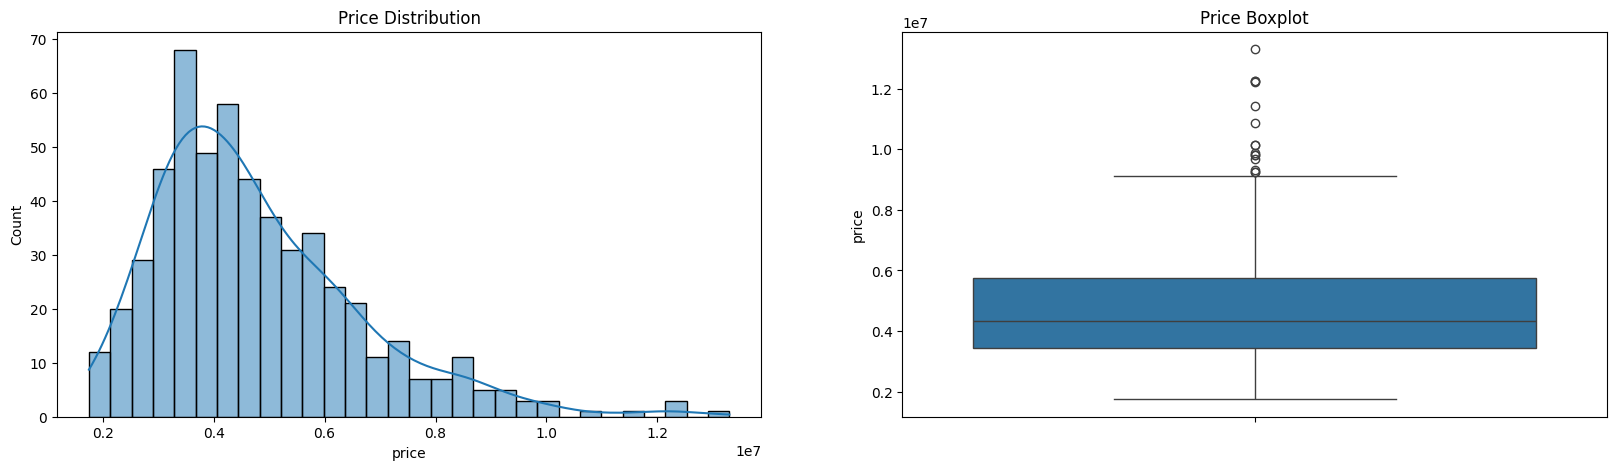

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=df, x='price', bins=30, kde=True, ax=ax[0])
ax[0].set_title('Price Distribution')
sns.boxplot(df['price'], ax=ax[1])
ax[1].set_title('Price Boxplot')
plt.show()

For Easier visualization lets convert the price into in millions.

In [7]:
df['price_in_millions'] = df['price'] / 1e6
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_in_millions
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [8]:
# drop the original price column
df.drop(columns=['price'], inplace=True)
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_in_millions
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


In [9]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_in_millions
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13.300
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12.250
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12.250
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12.215
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11.410


<Axes: xlabel='price_in_millions'>

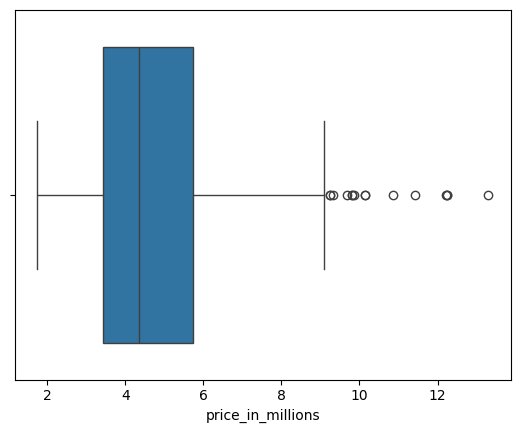

In [11]:
sns.boxplot(x='price_in_millions', data=df)


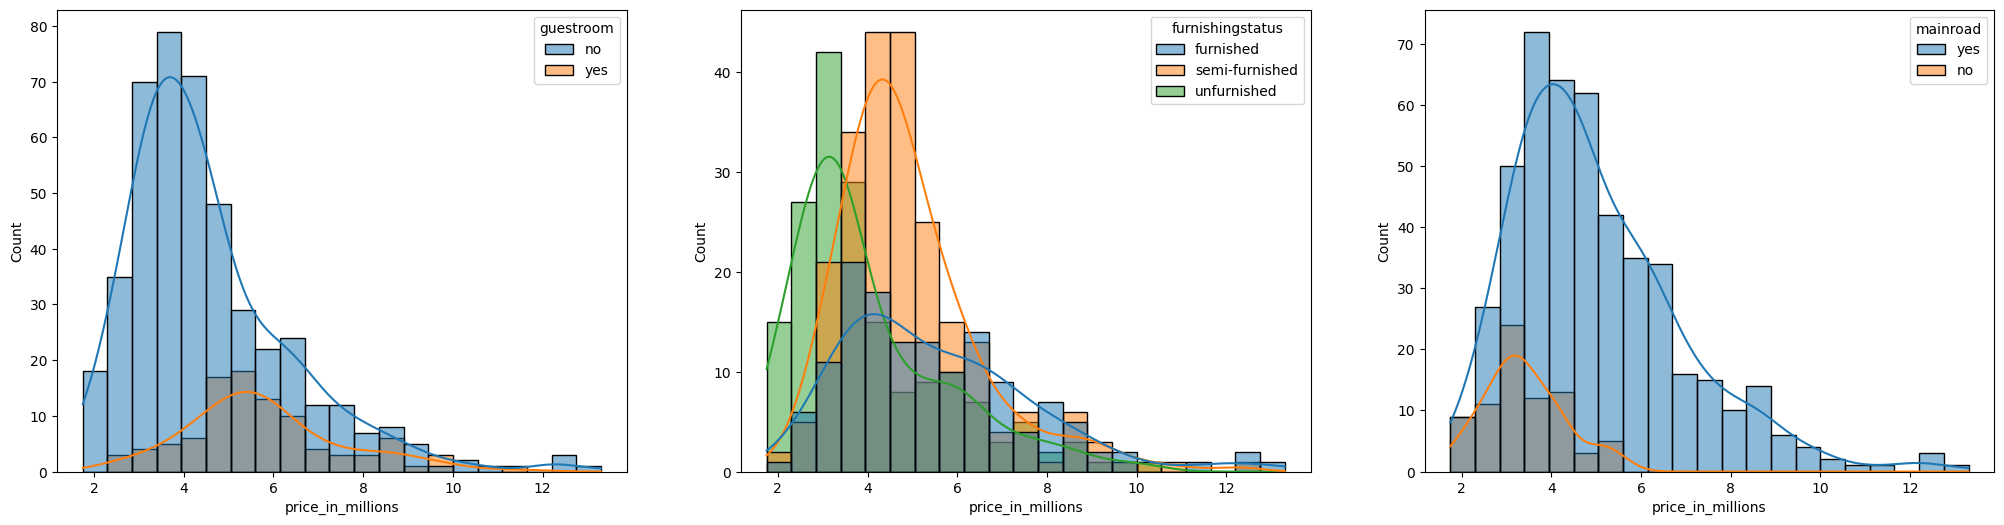

In [14]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df, x='price_in_millions',kde=True,hue='guestroom')
plt.subplot(132)
ax =sns.histplot(data=df, x='price_in_millions',kde=True,hue='furnishingstatus')
plt.subplot(133)
ax =sns.histplot(data=df, x='price_in_millions',kde=True,hue='mainroad')
plt.show()

In [18]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example: Detect outliers in price
outliers_price = detect_outliers_iqr(df, 'price_in_millions')
print(f'Number of price outliers: {outliers_price.shape[0]}')


Number of price outliers: 15


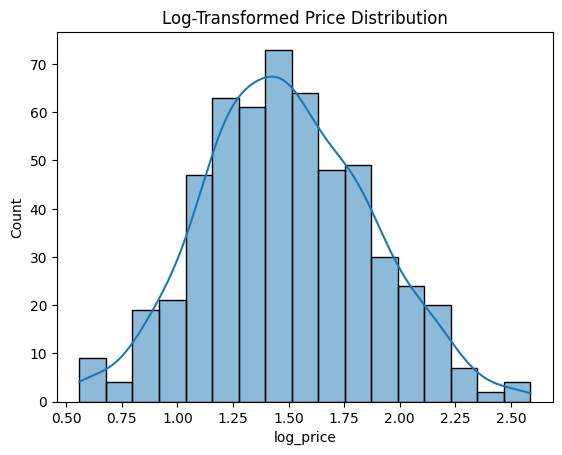

In [21]:
df['log_price'] = np.log(df['price_in_millions'])
sns.histplot(df['log_price'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.show()


In [22]:
df.drop(columns=['log_price'], inplace=True)

# Univariate Analysis for Numerical Columns

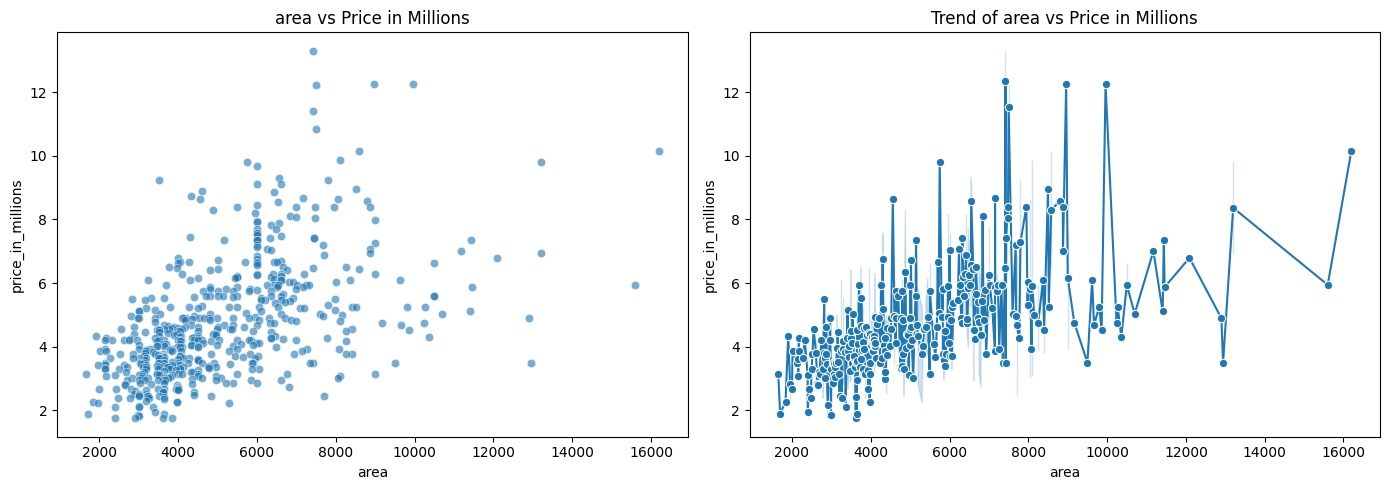

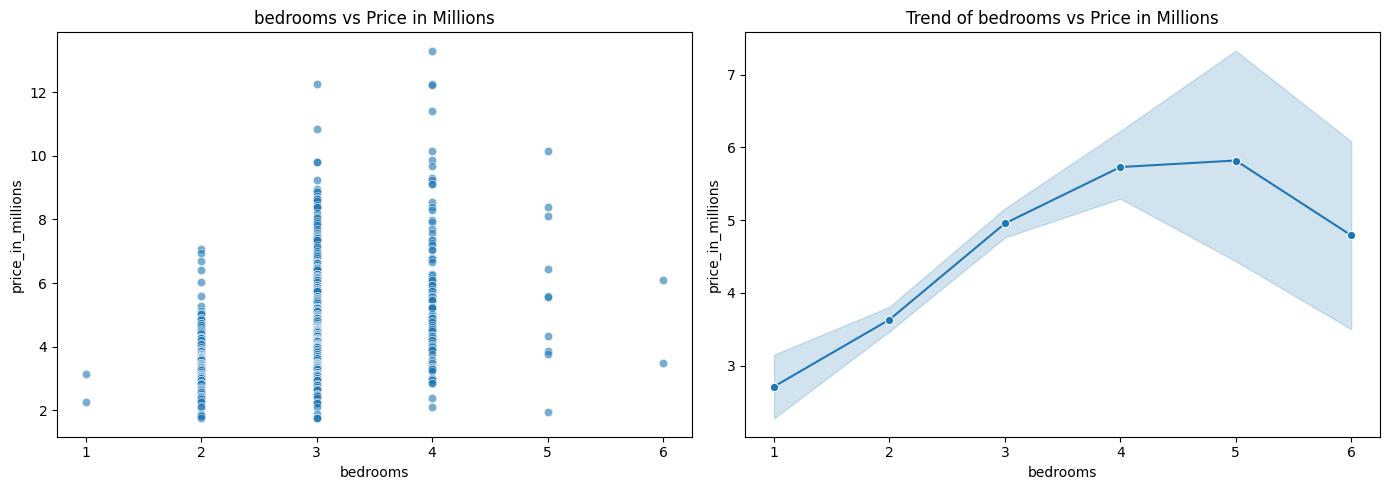

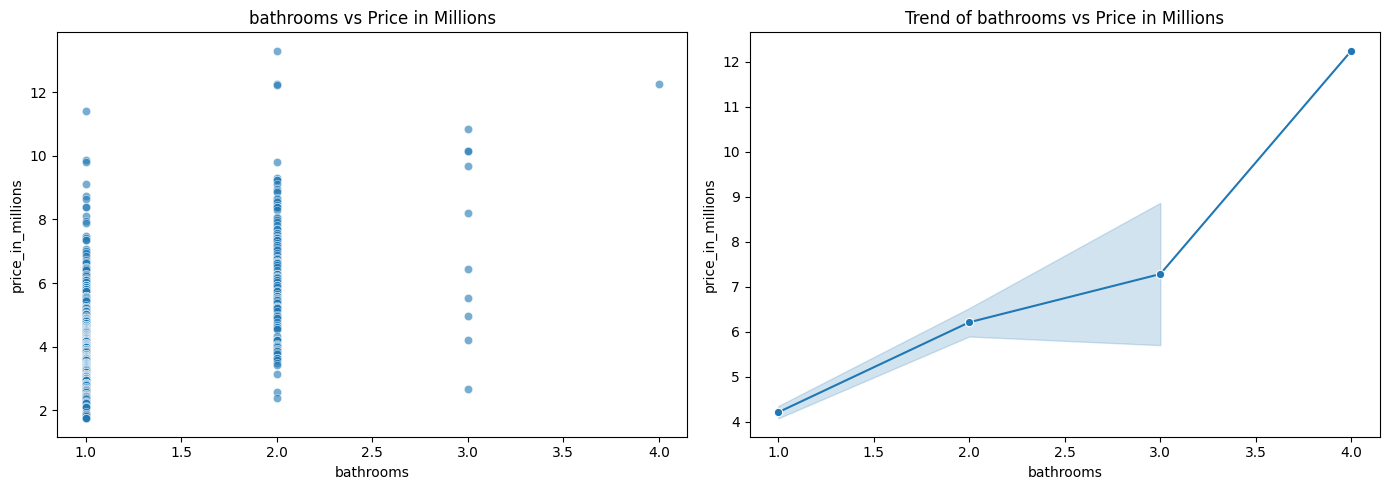

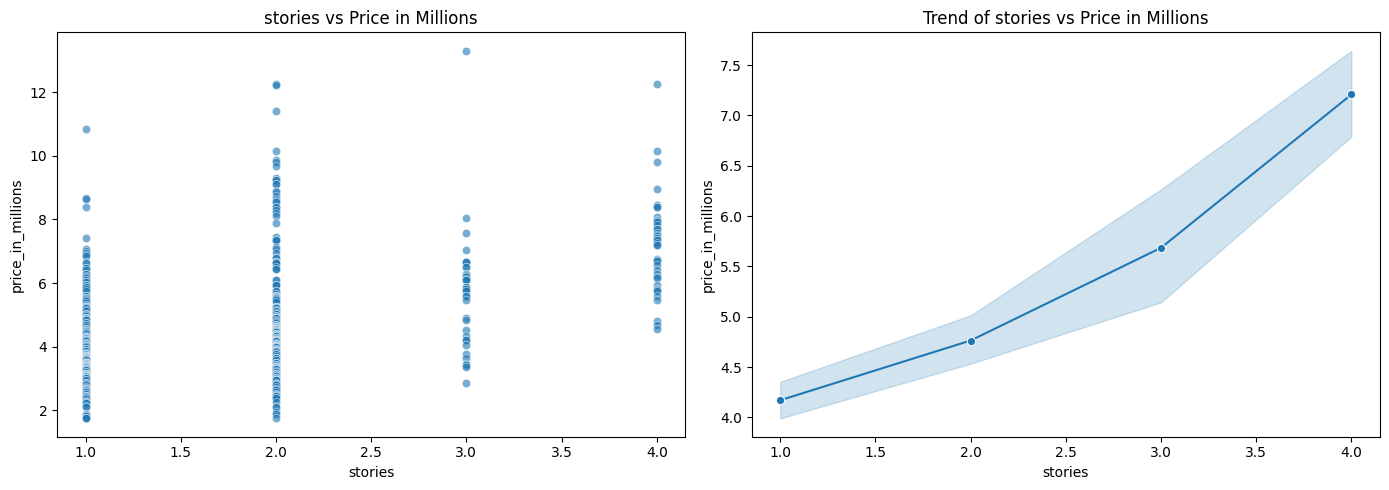

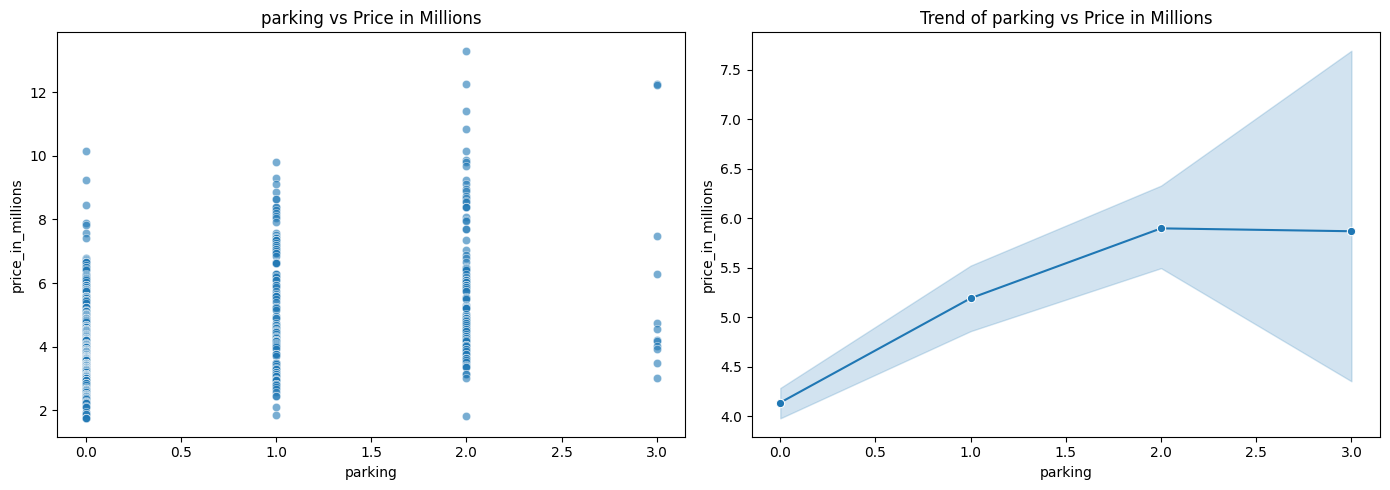

In [29]:
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for col in numerical_cols:
    plt.figure(figsize=(14, 5))
    
    # Visualization to compare how the price is affected by the numerical feature
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=col, y='price_in_millions', data=df, alpha=0.6)
    plt.title(f'{col} vs Price in Millions')
    
    #Line chart to show the trend
    plt.subplot(1, 2, 2)
    sns.lineplot(x=col, y='price_in_millions', data=df, marker='o')
    plt.title(f'Trend of {col} vs Price in Millions')
    
    
    plt.tight_layout()
    plt.show()


# Univariate Analysis for Categorical Columns

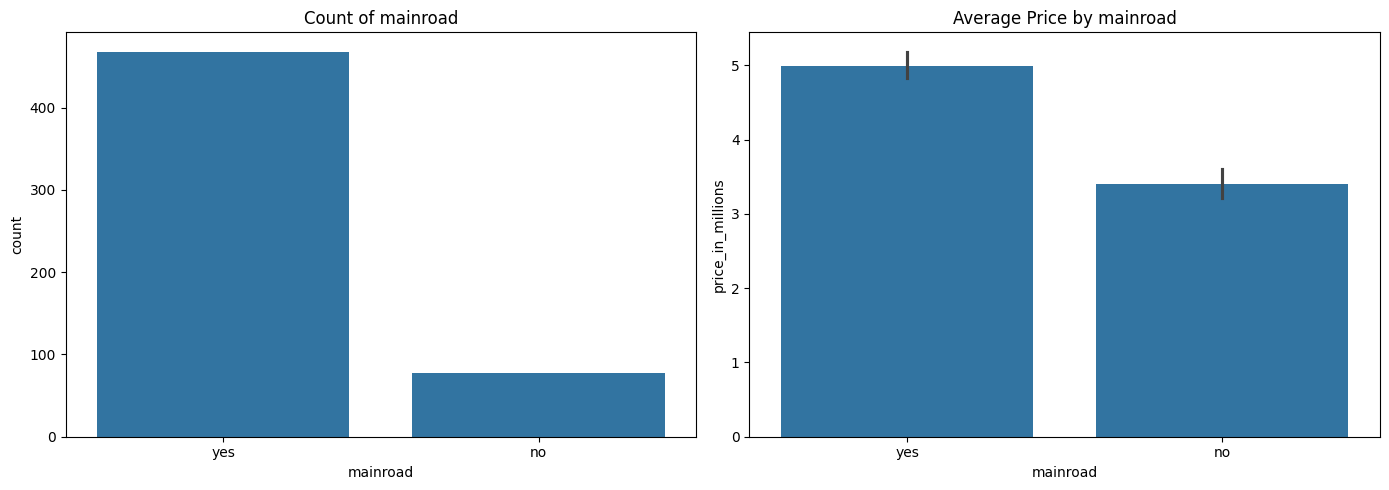

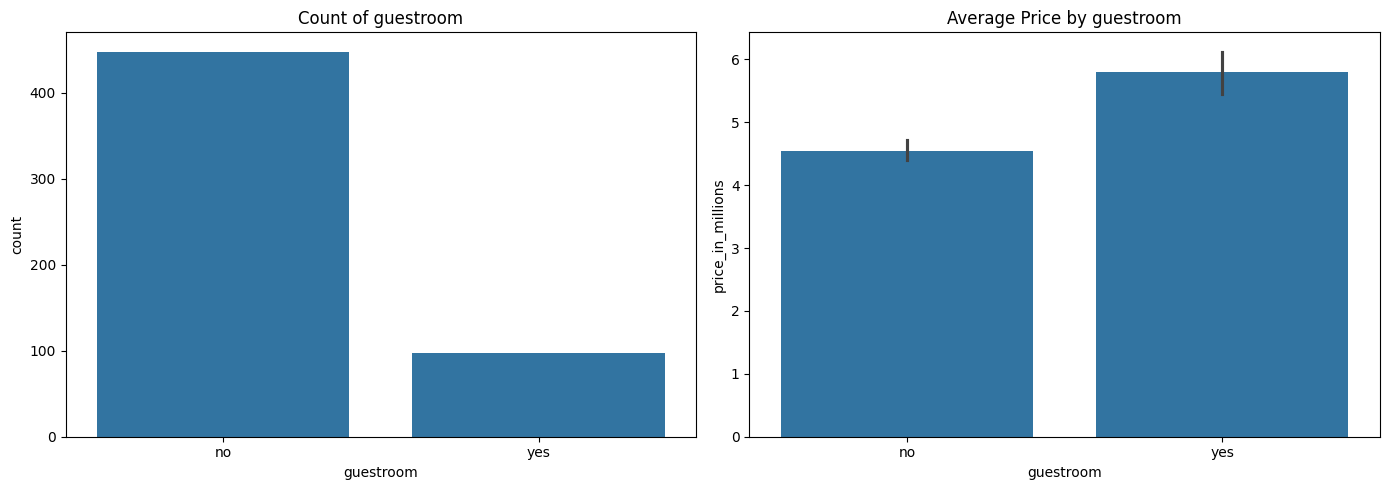

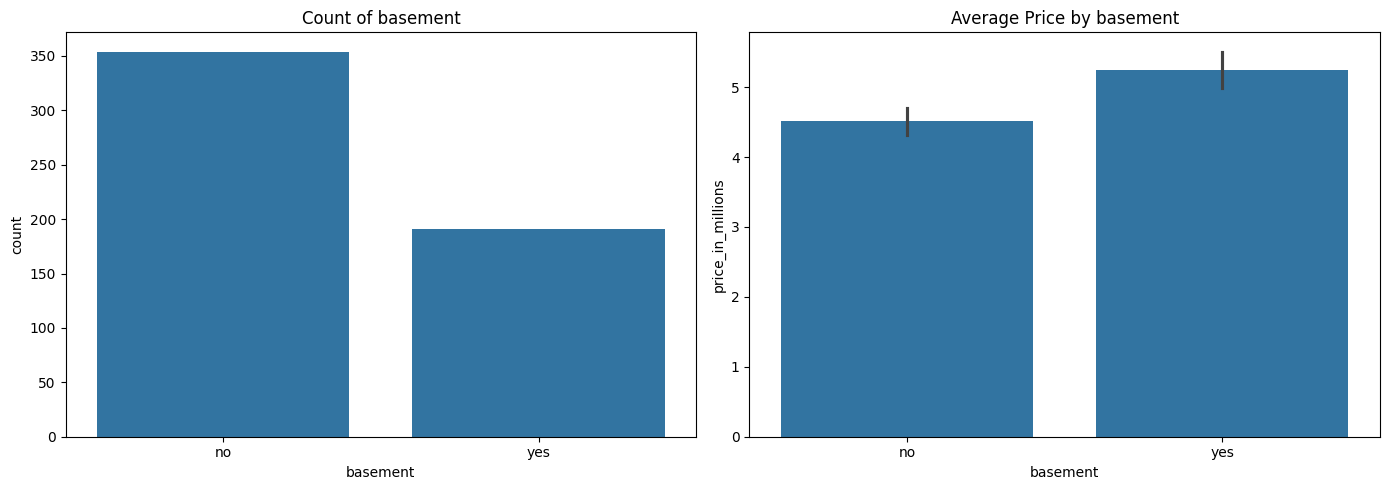

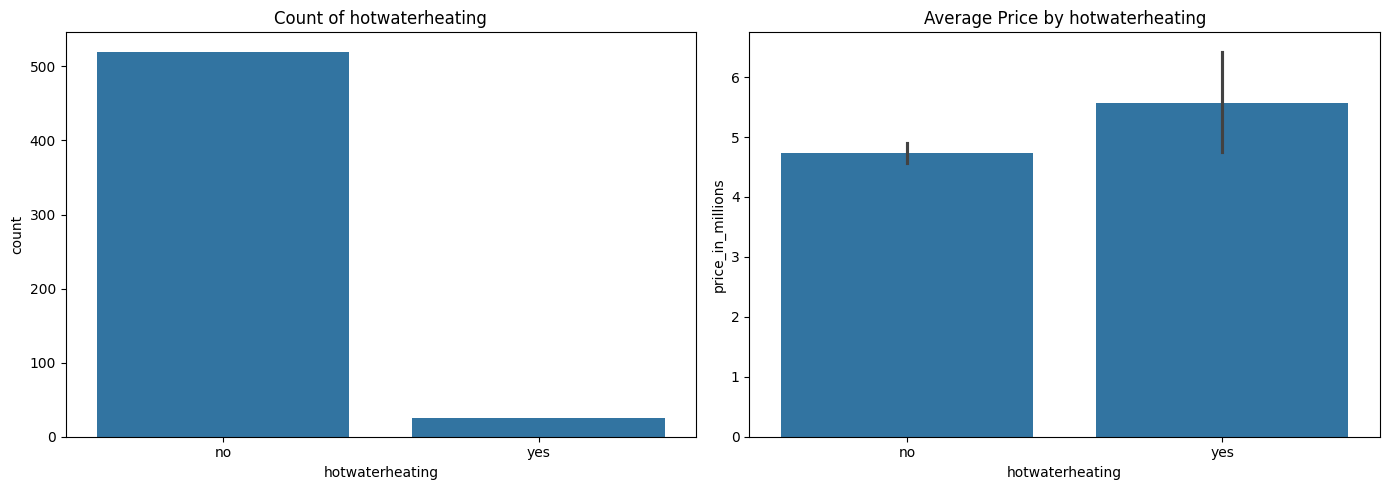

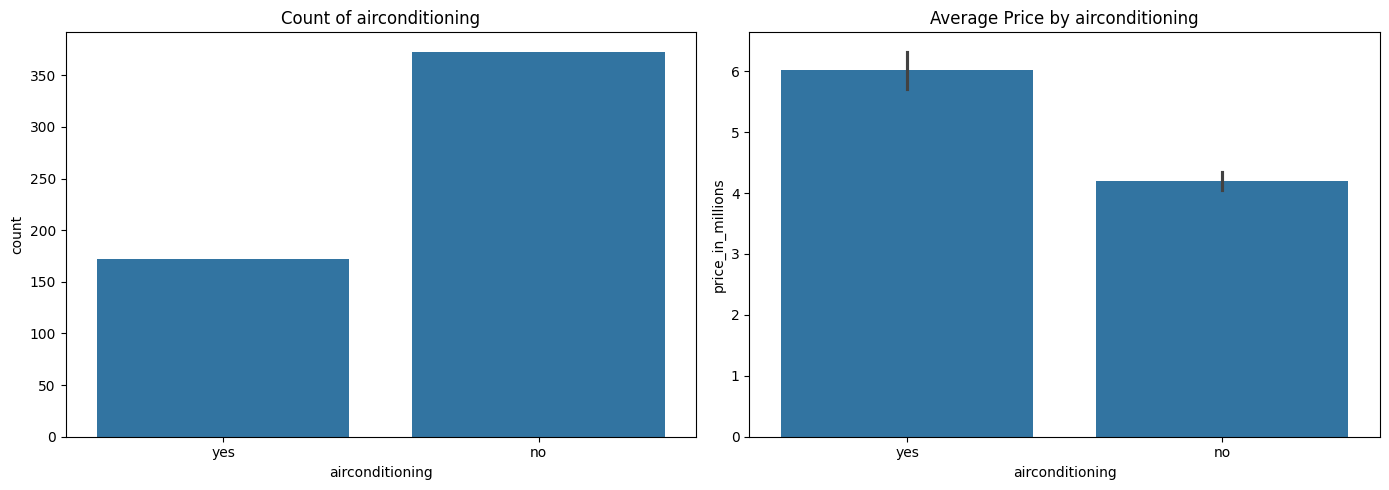

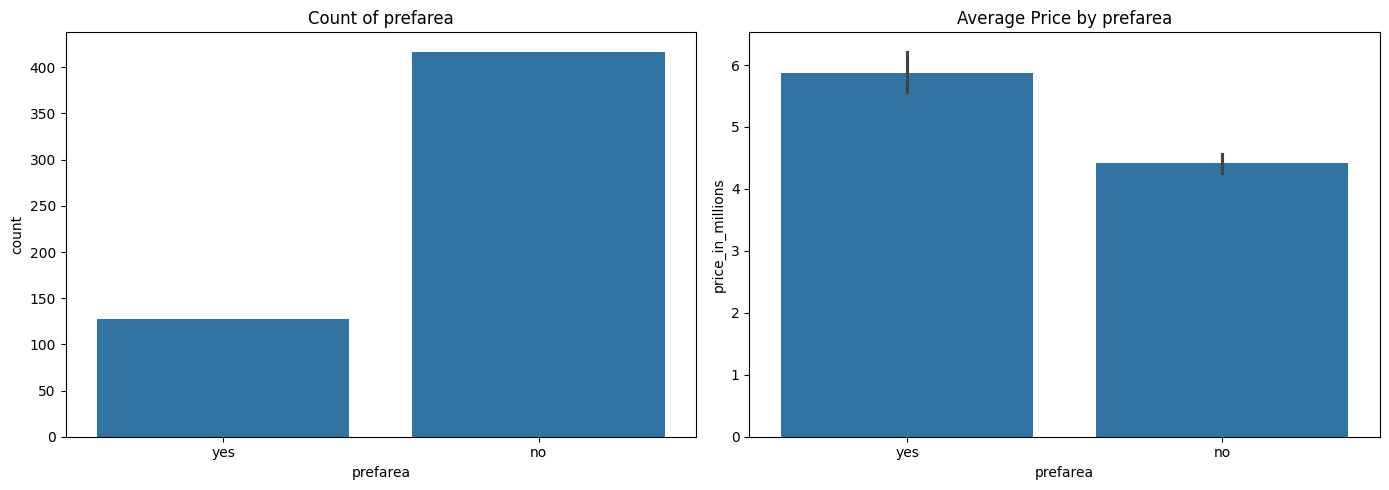

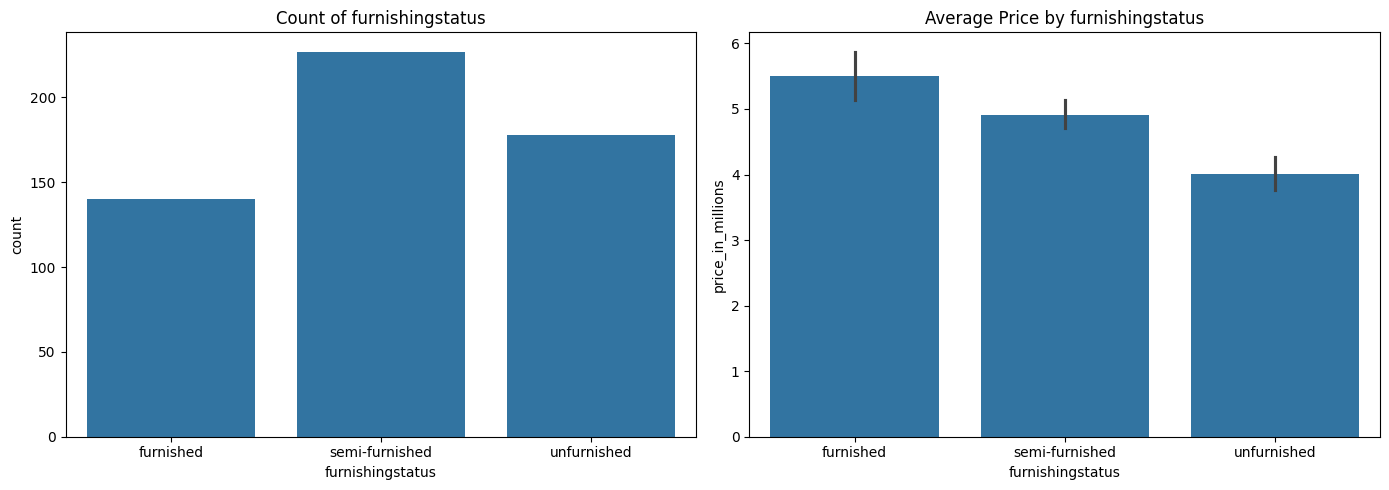

In [30]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    plt.figure(figsize=(14, 5))
    
    # Count plot
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    
    # Mean price per category
    plt.subplot(1, 2, 2)
    sns.barplot(x=col, y='price_in_millions', data=df, estimator=np.mean)
    plt.title(f'Average Price by {col}')
    
    plt.tight_layout()
    plt.show()
